This is the Time series Analysis Project for the dataset of "portland-oregon-average-monthly Bus Ridership (/100)" using SARIMA Model.The SARIMA is a extension of ARIMA that explicitly models the seasonal element in univariate data.

In [1]:
# Importing necessary python library
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the dataset file in CSV format
data = pd.read_csv('portland-oregon-average-monthly.csv')
data.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [3]:
# Tp check last 5 rows data
data.tail()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327
114,NaN,NaN
115,Portland Oregon average monthly bus ridership ...,n=114


In [4]:
#check the data size
data.shape

(116, 2)

In [5]:
# Drop the rows number 114 and 115 due to irrelevent data.
data.drop([114,115],inplace=True)

In [6]:
# to cross verify that data is removed or not
data.tail()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
109,1969-02,1425
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327


In [7]:
# our dataset's column name is too long to use. 
#So, we will change the name of 2nd column to short.


data.rename(columns={'Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114':'value'},
          inplace=True)
data.head()

,Month,value
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [8]:
# check data types of column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   114 non-null    object
 1   value   114 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


In [9]:
# 'Month' column has 'object' datatype. we need to change it to 'date' datatype.
data['Month']=data['Month'].apply(pd.to_datetime)

# 'value'column has 'object' datatype. wee neet to change it to 'int'datatype.
data['value'] = data['value'].astype('int')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   114 non-null    datetime64[ns]
 1   value   114 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.2 KB


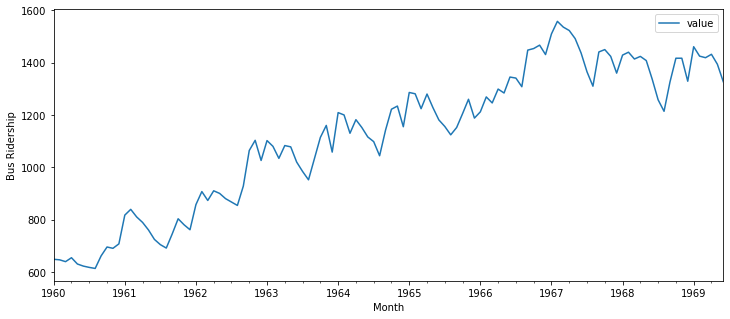

In [11]:
# set the Month column to index
data.set_index('Month',inplace=True)
#df.index=pd.to_datetime(df.index)

data.dropna(inplace=True)
data.plot(figsize = (12, 5))
plt.xlabel("Month")
plt.ylabel("Bus Ridership")
plt.show()

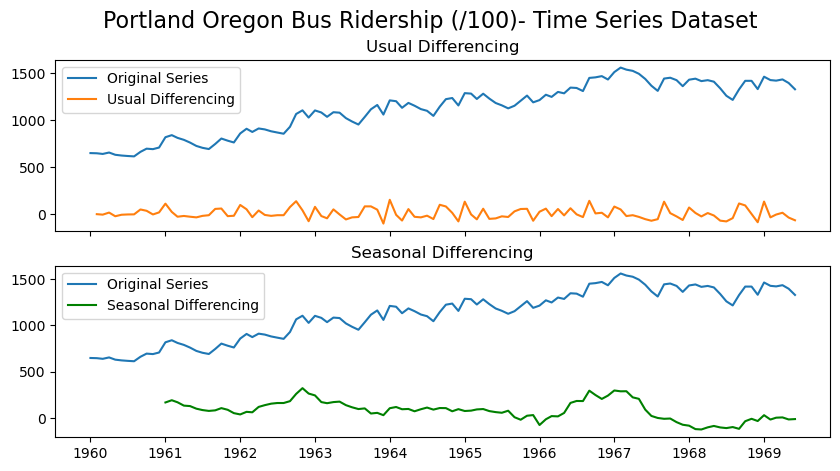

In [12]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Portland Oregon Bus Ridership (/100)- Time Series Dataset', fontsize=16)
plt.show()

In [13]:
#!pip3 install pmdarima

In [14]:
import pmdarima as pm

# pmdarima is a statistical library designed to fill the void in Python's time series analysis 
#A collection of statistical tests of stationarity and seasonality
#Time series utilities, such as differencing and inverse differencing

In [15]:
#The auto-ARIMA process seeks to identify the most optimal parameters for an ARIMA model, 
#settling on a single fitted ARIMA model.

smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()
    
#p: Trend autoregression order.
#d: Trend difference order.
#q: Trend moving average order.
#P: Seasonal autoregressive order.
#D: Seasonal difference order.
#Q: Seasonal moving average order.
#m: The number of time steps for a single seasonal period.
#m=1 means yearly data ; m=4 means quaterly data; m=12 means monthly data

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1016.812, Time=0.19 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1026.564, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1023.334, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1014.867, Time=0.16 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1028.031, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.51 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1023.334, Time=0.11 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1013.365, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1021.337, Time=0.05 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1014.9

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -504.683
Date:                              Mon, 03 Oct 2022   AIC                           1013.365
Time:                                      10:20:30   BIC                           1018.596
Sample:                                  01-01-1960   HQIC                          1015.483
                                       - 06-01-1969                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.6937      0.118     -5.867      0.000      -0.925      -0.462
sigma2      1185.5628    183.539      6.459      0.000     825.832    1545.293
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):                 2.01
Prob(Q):                              0.42   Prob(JB):                         0.37
Heteroskedasticity (H):               1.49   Skew:                             0.28
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

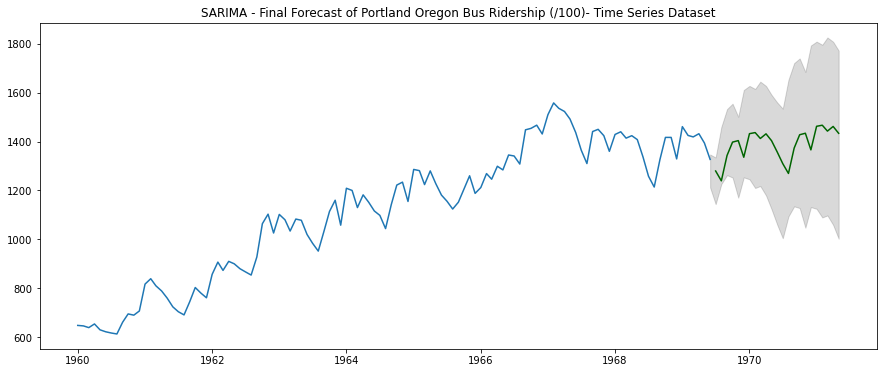

In [16]:
# Lets do predition for 24 months
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS') # MS- Month start frequency

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.rcParams['figure.figsize'] = [15, 6] # increase the size of graph.
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Portland Oregon Bus Ridership (/100)- Time Series Dataset")
plt.show()